# 서울시 구별 CCTV 현황 분석하기

In [98]:
import pandas as pd
CCTV_Seoul = pd.read_csv('../Data/01. CCTV_in_Seoul.csv', encoding='utf-8')

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [15]:
CCTV_Seoul.rename(columns={'기관명':'구별'}, inplace= True)
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
구별           25 non-null object
소계           25 non-null int64
2013년도 이전    25 non-null int64
2014년        25 non-null int64
2015년        25 non-null int64
2016년        25 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


# 엑셀 파일 읽기 - 서울시 인구 현황

In [19]:
pop_seoul = pd.read_excel('../Data/01. population_in_Seoul.xls', 
                          header =2,
                          usecols='B, D, G, J, N',
                          encoding='utf-8')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [24]:
pop_seoul.rename(columns={'자치구':'구별',
                          '계':'인구수',
                          '계.1':'한국인',
                          '계.2':'외국인',
                          '65세이상고령자':'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## CCTV와 인구 현황 데이터 파악하기

In [34]:
#CCTV 데이터 소계기준으로 정렬
CCTV_Seoul.sort_values(by='소계', ascending=True,inplace=True)
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [35]:
CCTV_Seoul.tail(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


#### 2013년 대비 3년간 (2014-2016) CCTV 증가율 

In [43]:
CCTV_Seoul['최근증가율']=100*((CCTV_Seoul['2014년']+CCTV_Seoul['2015년']+CCTV_Seoul['2016년'])/CCTV_Seoul['2013년도 이전'])

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


#### 인구 데이터

In [54]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [61]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [60]:
pop_seoul.drop([26], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
6,동대문구,369496.0,354079.0,15417.0,54173.0


In [63]:
pop_seoul['외국인비율']=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율']=pop_seoul['고령자']/pop_seoul['인구수']*100

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [64]:
pop_seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [65]:
pop_seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [66]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


#### 인구 대비 CCTV 설치율 

In [69]:
cctv_pop = CCTV_Seoul.merge(pop_seoul, on=['구별'])
cctv_pop.drop(columns=['2013년도 이전','2014년','2015년','2016년'], inplace=True)
cctv_pop.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
1,마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110
2,송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
3,중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
4,중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


#### CCTV 소계와 인구 데이터 사이 상관관계 

#### np.corrcoef : 데이터 간 상관관계 행렬로 반환

     상관계수의 절대값이 클수록(1에 가까울수록) 관계성이 높음 
     

In [74]:
# 인구수 대비 CCTV 소계
import numpy as np

np.corrcoef(cctv_pop['인구수'],cctv_pop['소계'])

array([[1.        , 0.30147182],
       [0.30147182, 1.        ]])

In [77]:
np.corrcoef(cctv_pop['외국인비율'],cctv_pop['소계'])

array([[ 1.       , -0.1249097],
       [-0.1249097,  1.       ]])

In [76]:
np.corrcoef(cctv_pop['고령자비율'],cctv_pop['소계'])

array([[ 1.       , -0.3422611],
       [-0.3422611,  1.       ]])

In [78]:
cctv_pop.sort_values(by='소계',ascending=False).head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
23,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
22,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
21,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
20,은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
19,용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [79]:
cctv_pop.sort_values(by='인구수',ascending=False).head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
7,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
14,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
17,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## CCTV 현황 시각화

In [96]:
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

In [95]:
labels =list(cctv_pop[['구별']])
fig= px.bar(y=cctv_pop['구별'],x=cctv_pop['소계'],orientation='h')

fig.show()

In [111]:
fig1= px.scatter(x=cctv_pop['인구수'],y=cctv_pop['소계'], labels=dict(x='인구수', y='CCTV소계'))
fig1.show()

In [117]:
fp1 = np.polyfit(cctv_pop['인구수'],cctv_pop['소계'],1)
print(fp1)
f1 = np.poly1d(fp1) # 매개변수로 모델 생성(1d: 일차식)
print(f1)
fx = np.linspace(100000,700000,100) # x축 범위 설정 

[1.27016392e-03 6.78753359e+02]
 
0.00127 x + 678.8


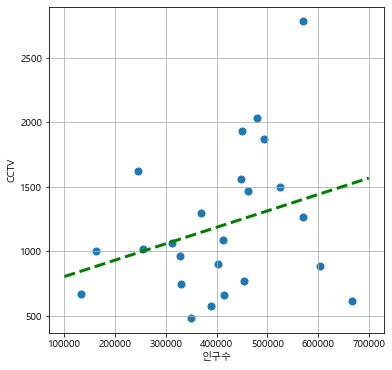

In [115]:
plt.figure(figsize=(6,6))
plt.scatter(x=cctv_pop['인구수'],y=cctv_pop['소계'], s=50)
plt.plot(fx,f1(fx), ls='dashed',lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [136]:
cctv_pop['오차']= np.abs(cctv_pop['소계']-f1(cctv_pop['인구수']))

df_sort = cctv_pop.sort_values(by='오차', ascending=False)
df_sort.reset_index(drop=True,inplace=True)
df_sort.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1376.618125
1,송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,908.566183
2,양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,745.595903
3,서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,679.279126
4,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,636.590929


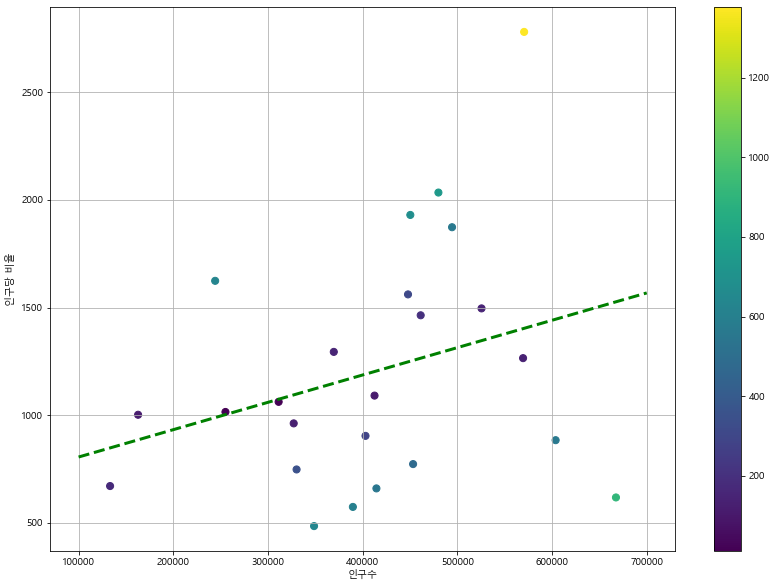

In [120]:
plt.figure(figsize=(14,10))
plt.scatter(cctv_pop['인구수'],cctv_pop['소계'], c=cctv_pop['오차'], s=50)

plt.plot(fx,f1(fx), ls='dashed',lw=3, color='g')

plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()

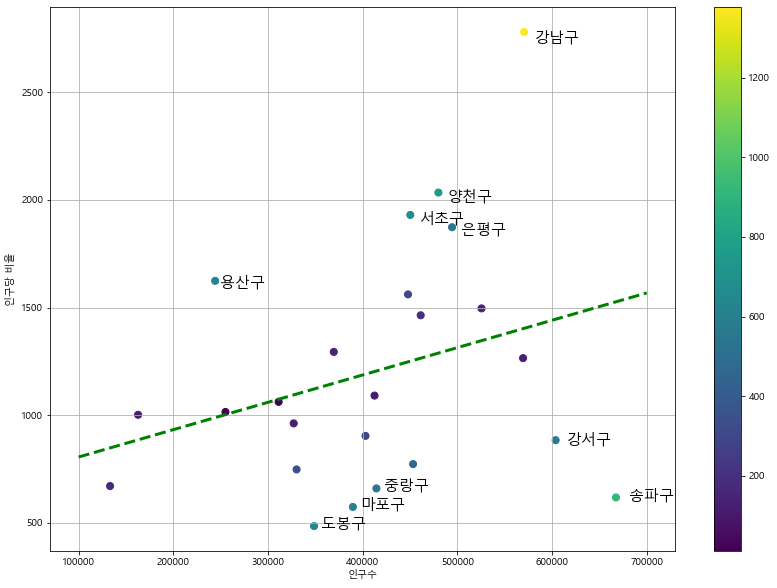

In [131]:
plt.figure(figsize=(14,10))
plt.scatter(cctv_pop['인구수'],cctv_pop['소계'], c=cctv_pop['오차'], s=50)

plt.plot(fx,f1(fx), ls='dashed',lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort['구별'][n], fontsize=15)
plt.xlabel('인구수')
plt.ylabel('인구당 비율')

plt.colorbar()
plt.grid()
plt.show()